In [21]:
import sys
import pandas as pd
import matplotlib
import sklearn
import seaborn

print(sys.version)
print(matplotlib.__version__)
print(pd.__version__)
print(sklearn.__version__)
print(seaborn.__version__)

3.7.3 (default, Mar 27 2019, 09:23:39) 
[Clang 10.0.0 (clang-1000.11.45.5)]
3.1.1
0.24.2
0.20.3
0.9.0


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [23]:
# loading the data
games = pd.read_csv('games.csv')

In [24]:
# print names of the features
print(games.columns)
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


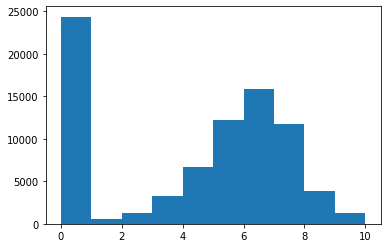

In [25]:
# make a histogram of all the names of the csv file
plt.hist(games["average_rating"])
plt.show()

In [26]:
#print first row with zero scores
print(games[games["average_rating"] ==0].iloc[0])

#print first row with scores greater than zero scores
print(games[games["average_rating"] >0].iloc[0])


id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

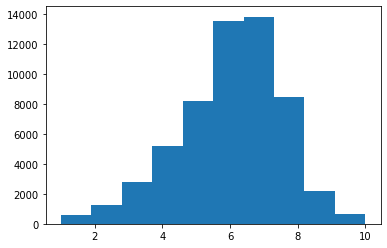

In [27]:
#remove all rows with no user reviews
games = games[games["users_rated"] > 0]

#remove all rows with missing values
games = games.dropna(axis=0)

#make a histogram of modified data
plt.hist(games["average_rating"])
plt.show()

In [28]:
print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


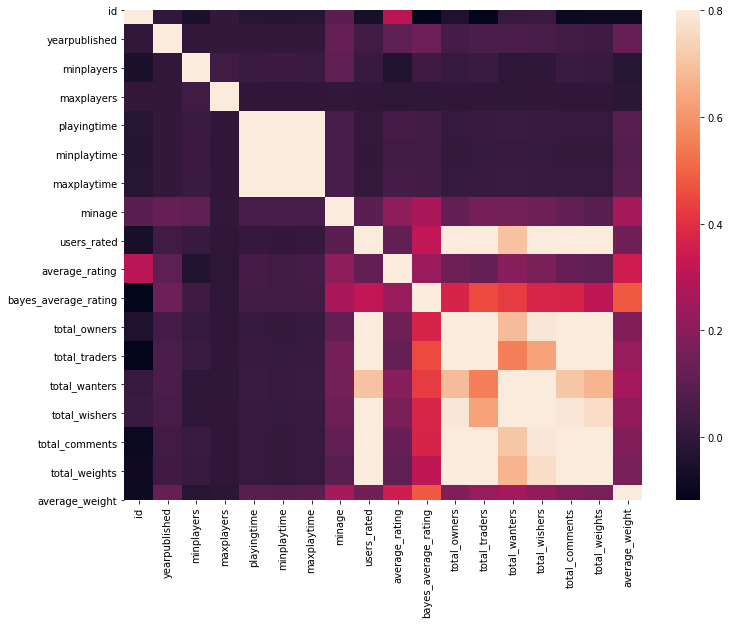

In [29]:
#correlation matrix
correlat = games.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(correlat, vmax=0.8, square = True)
plt.show()

In [10]:
# data set preprocessing
columns = games.columns.tolist()

#remove the undesired columns
columns = [c for c in columns if c not in ["bayes_average_rating","average_rating","type","name","id"]]

#store the variable to be predicted on
target = "average_rating"


In [30]:
#training and test dataset
train = games.sample(frac=0.8, random_state =1)

test = games.loc[~games.index.isin(train.index)]

#print shape of test and train dataset
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [31]:
# import linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# initialise the model class
LR = LinearRegression()

# fit the model to the training data
LR.fit(train[columns], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
# generate the prediction for testing set
predictions = LR.predict(test[columns])

# compute error between test predictions and actual value
mean_squared_error(predictions, test[target])

2.078819032629324

In [33]:
# import non linear model(random forest)
from sklearn.ensemble import RandomForestRegressor

#initialise the model class
RFR = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state =1)

#fit the model to the data
RFR.fit(train[columns], train[target])

#generate predictions
predictions = RFR.predict(test[columns])

#computing error
mean_squared_error(predictions, test[target])

1.4458560046071653

In [34]:
test[columns].iloc[0]

yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64

In [35]:
rating_LR = LR.predict(test[columns].iloc[0].values.reshape(1,-1))
rating_RFR = RFR.predict(test[columns].iloc[0].values.reshape(1,-1))

# print the predictions
print(rating_LR)
print(rating_RFR)

[8.12061283]
[7.91373581]


In [36]:
#print actual value
test[target].iloc[0]

8.07933